### importing the dataset and the necessary libraries and processing

In [92]:
#importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('project_ml.csv')

In [94]:
#print the dataseet

df.head()

,Age,Gender,Height,Weight,BMR
0,22,m,178,86,1868
1,22,m,173,60,1576
2,21,m,172,80,1775
3,27,m,188,120,2244
4,25,f,156,66,1349


In [95]:
null_values = df.isnull().sum()
print(null_values)

Age       0
Gender    0
Height    0
Weight    0
BMR       0
dtype: int64


In [96]:
male_count = df.Gender.T.value_counts()['m']
female_count =df.Gender.T.value_counts()['f']

print(f"Number of males: {male_count}")
print(f"Number of females: {female_count}")

Number of males: 110
Number of females: 90


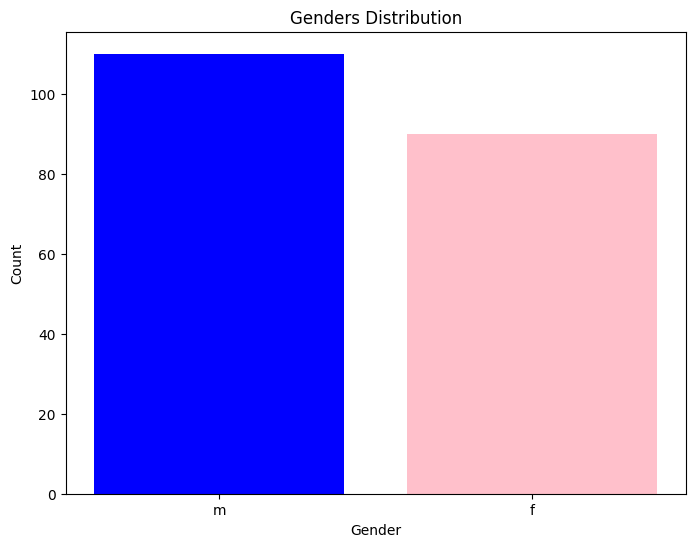

In [97]:
gender_counts = df['Gender'].value_counts()

#plot using matplotlib
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Genders Distribution')
plt.show()

In [98]:
#adding a new feature BMI

df['BMI'] = df['Weight'] /(df['Height']/100)**2

In [99]:
df.head()

,Age,Gender,Height,Weight,BMR,BMI
0,22,m,178,86,1868,27.143037
1,22,m,173,60,1576,20.047446
2,21,m,172,80,1775,27.041644
3,27,m,188,120,2244,33.952014
4,25,f,156,66,1349,27.120316


In [100]:
def classify_bmi(bmi):
    if bmi < 20:
        return 'skinny'
    elif 20 <= bmi < 25:
        return 'fit'
    else:
        return 'fat'

# Apply classification to the dataset
df['Category'] = df['BMI'].apply(classify_bmi)

# Count the number of each category
category_counts = df['Category'].value_counts()

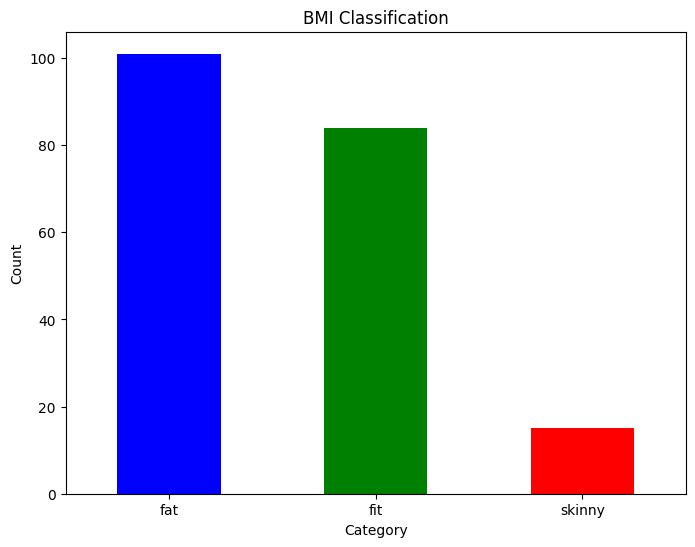

In [101]:
#plotting the chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('BMI Classification')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Linear Regression Model

In [102]:
df.head(1)

,Age,Gender,Height,Weight,BMR,BMI,Category
0,22,m,178,86,1868,27.143037,fat


In [103]:
df['HxW'] = (df['Weight'] * df['Height'])/100

In [104]:
df.head(1)

,Age,Gender,Height,Weight,BMR,BMI,Category,HxW
0,22,m,178,86,1868,27.143037,fat,153.08


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

# Filter data by gender
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']

# Prepare data for males
X_male = df_male[['HxW']]
y_male = df_male['BMR']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Prepare data for females
X_female = df_female[['HxW']]
y_female = df_female['BMR']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train the model for males
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

# Train the model for females
model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Evaluate the male model
y_pred_male = model_male.predict(X_test_male)
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)
print("Male Model - Mean Squared Error:", mse_male)
print("Male Model - R-squared:", r2_male)

# Evaluate the female model
y_pred_female = model_female.predict(X_test_female)
mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)
print("Female Model - Mean Squared Error:", mse_female)
print("Female Model - R-squared:", r2_female)

Male Model - Mean Squared Error: 3311.5207725463497
Male Model - R-squared: 0.8793066327589318
Female Model - Mean Squared Error: 3339.066601502298
Female Model - R-squared: 0.5949417291200936


### Multi Linear Regression Model

In [106]:
df.head(1)

,Age,Gender,Height,Weight,BMR,BMI,Category,HxW
0,22,m,178,86,1868,27.143037,fat,153.08


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Filter data by gender
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']

# Prepare data for males
X_male = df_male[['Age','Height', 'Weight']]
y_male = df_male['BMR']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Prepare data for females
X_female = df_female[['Age','Height', 'Weight']]
y_female = df_female['BMR']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train the model for males
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

# Train the model for females
model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Evaluate the male model
y_pred_male = model_male.predict(X_test_male)
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)
print("Male Model - Mean Squared Error:", mse_male)
print("Male Model - R-squared:", r2_male)

# Evaluate the female model
y_pred_female = model_female.predict(X_test_female)
mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)
print("Female Model - Mean Squared Error:", mse_female)
print("Female Model - R-squared:", r2_female)

Male Model - Mean Squared Error: 1913.3290239321648
Male Model - R-squared: 0.93026583905108
Female Model - Mean Squared Error: 3584.0236498597083
Female Model - R-squared: 0.5652262755850079


### Decision Tree Regression Model

In [108]:
df.head(1)

,Age,Gender,Height,Weight,BMR,BMI,Category,HxW
0,22,m,178,86,1868,27.143037,fat,153.08


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Filter data by gender
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']

# Prepare data for males
X_male = df_male[['Age', 'Height', 'Weight']]
y_male = df_male['BMR']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Prepare data for females
X_female = df_female[['Age', 'Height', 'Weight']]
y_female = df_female['BMR']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train the model for males
model_male = DecisionTreeRegressor(random_state=42)
model_male.fit(X_train_male, y_train_male)

# Train the model for females
model_female = DecisionTreeRegressor(random_state=42)
model_female.fit(X_train_female, y_train_female)

# Evaluate the male model
y_pred_male = model_male.predict(X_test_male)
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)
print("Male Model - Mean Squared Error:", mse_male)
print("Male Model - R-squared:", r2_male)

# Evaluate the female model
y_pred_female = model_female.predict(X_test_female)
mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)
print("Female Model - Mean Squared Error:", mse_female)
print("Female Model - R-squared:", r2_female)


Male Model - Mean Squared Error: 4783.090909090909
Male Model - R-squared: 0.8256730404881543
Female Model - Mean Squared Error: 4397.277777777777
Female Model - R-squared: 0.4665713668472695


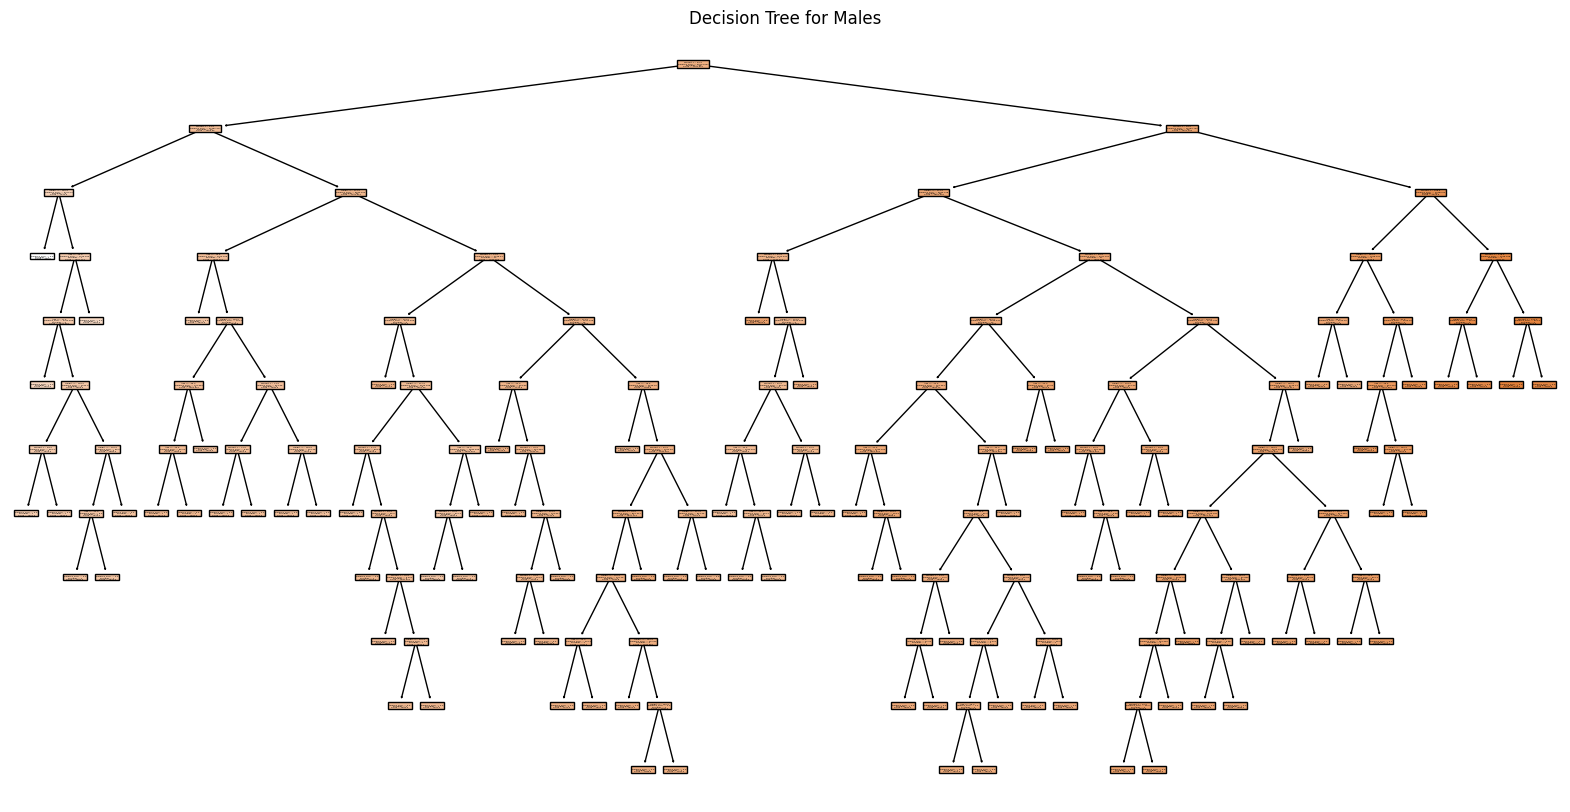

In [110]:
# Visualize the decision tree for males
plt.figure(figsize=(20,10))
plot_tree(model_male, feature_names=['Age', 'Height', 'Weight'], filled=True)
plt.title("Decision Tree for Males")
plt.show()


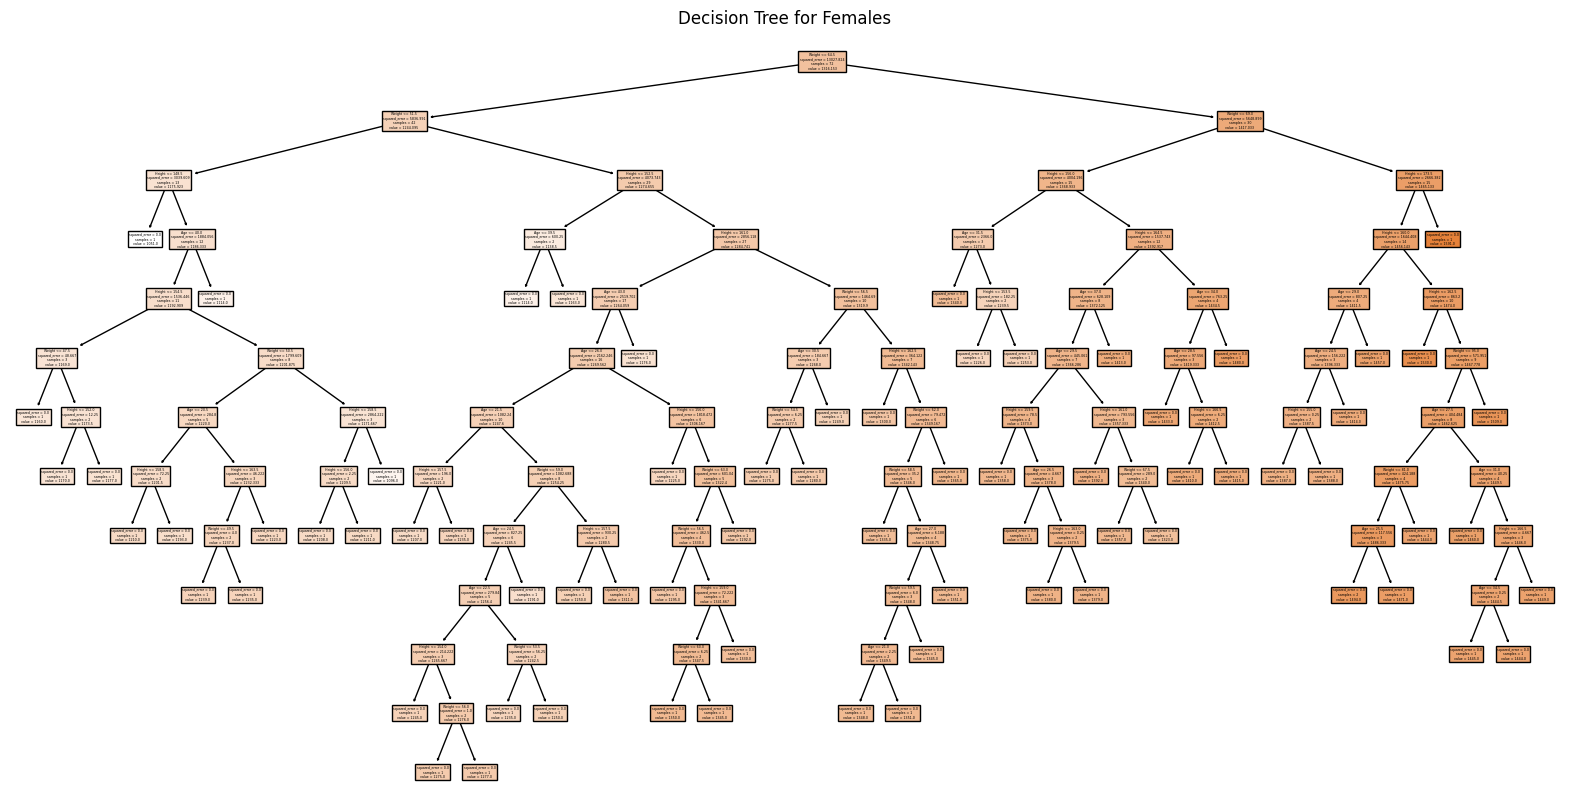

In [111]:
# Visualize the decision tree for females
plt.figure(figsize=(20,10))
plot_tree(model_female, feature_names=['Age', 'Height', 'Weight'], filled=True)
plt.title("Decision Tree for Females")
plt.show()


### Random Forest Model

In [112]:
df.head(1)

,Age,Gender,Height,Weight,BMR,BMI,Category,HxW
0,22,m,178,86,1868,27.143037,fat,153.08


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


# Filter data by gender
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']

# Prepare data for males
X_male = df_male[['Age', 'Height', 'Weight']]
y_male = df_male['BMR']
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Prepare data for females
X_female = df_female[['Age', 'Height', 'Weight']]
y_female = df_female['BMR']
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Train the model for males
model_male = RandomForestRegressor(n_estimators=100, random_state=42)
model_male.fit(X_train_male, y_train_male)

# Train the model for females
model_female = RandomForestRegressor(n_estimators=100, random_state=42)
model_female.fit(X_train_female, y_train_female)

# Evaluate the male model
y_pred_male = model_male.predict(X_test_male)
mse_male = mean_squared_error(y_test_male, y_pred_male)
r2_male = r2_score(y_test_male, y_pred_male)
print("Male Model - Mean Squared Error:", mse_male)
print("Male Model - R-squared:", r2_male)

# Evaluate the female model
y_pred_female = model_female.predict(X_test_female)
mse_female = mean_squared_error(y_test_female, y_pred_female)
r2_female = r2_score(y_test_female, y_pred_female)
print("Female Model - Mean Squared Error:", mse_female)
print("Female Model - R-squared:", r2_female)



Male Model - Mean Squared Error: 2952.1109863636357
Male Model - R-squared: 0.892405864288266
Female Model - Mean Squared Error: 3544.773688888885
Female Model - R-squared: 0.5699876425238382


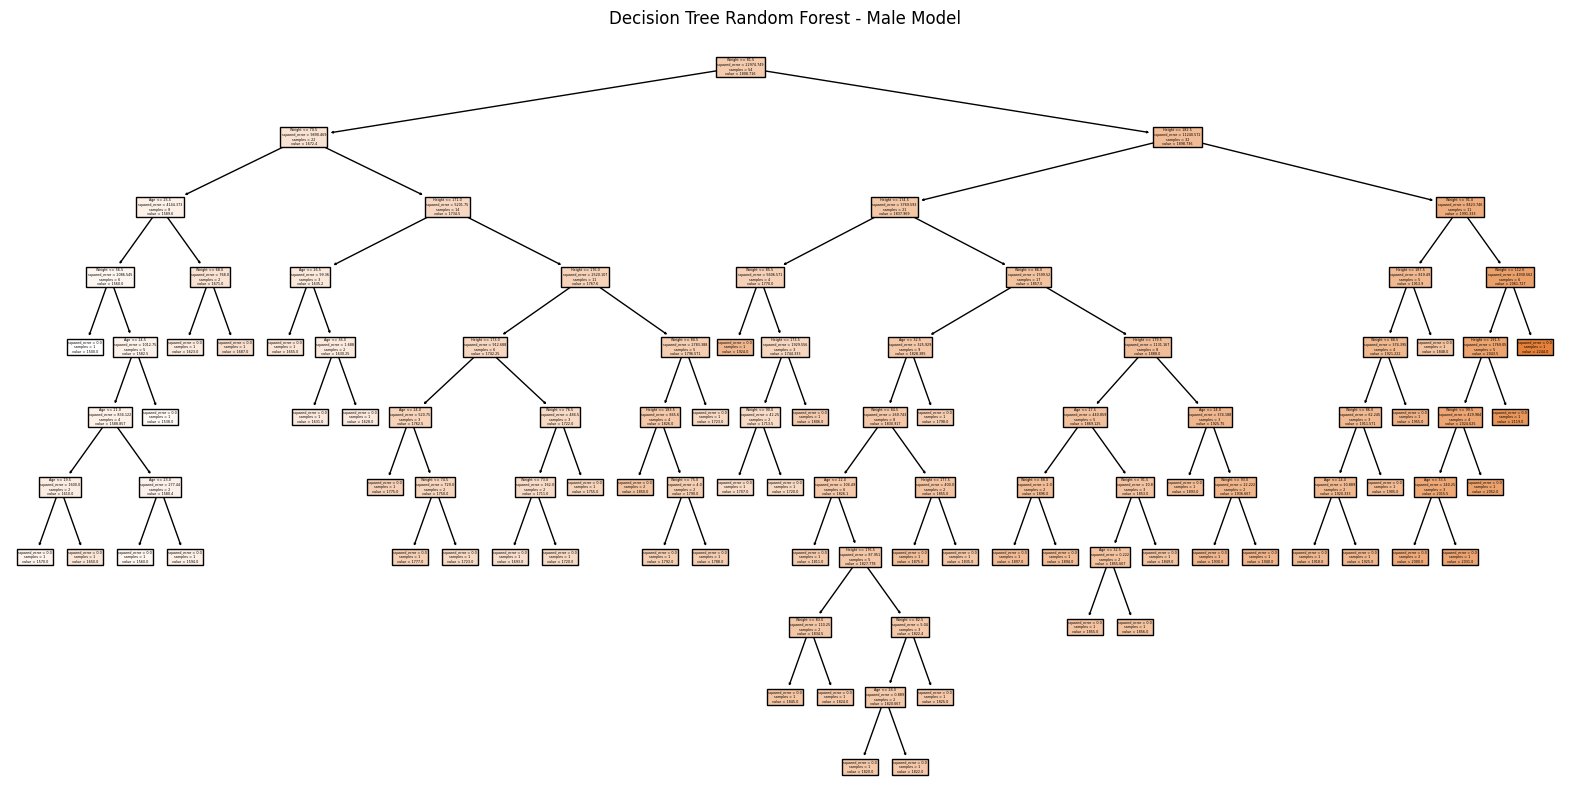

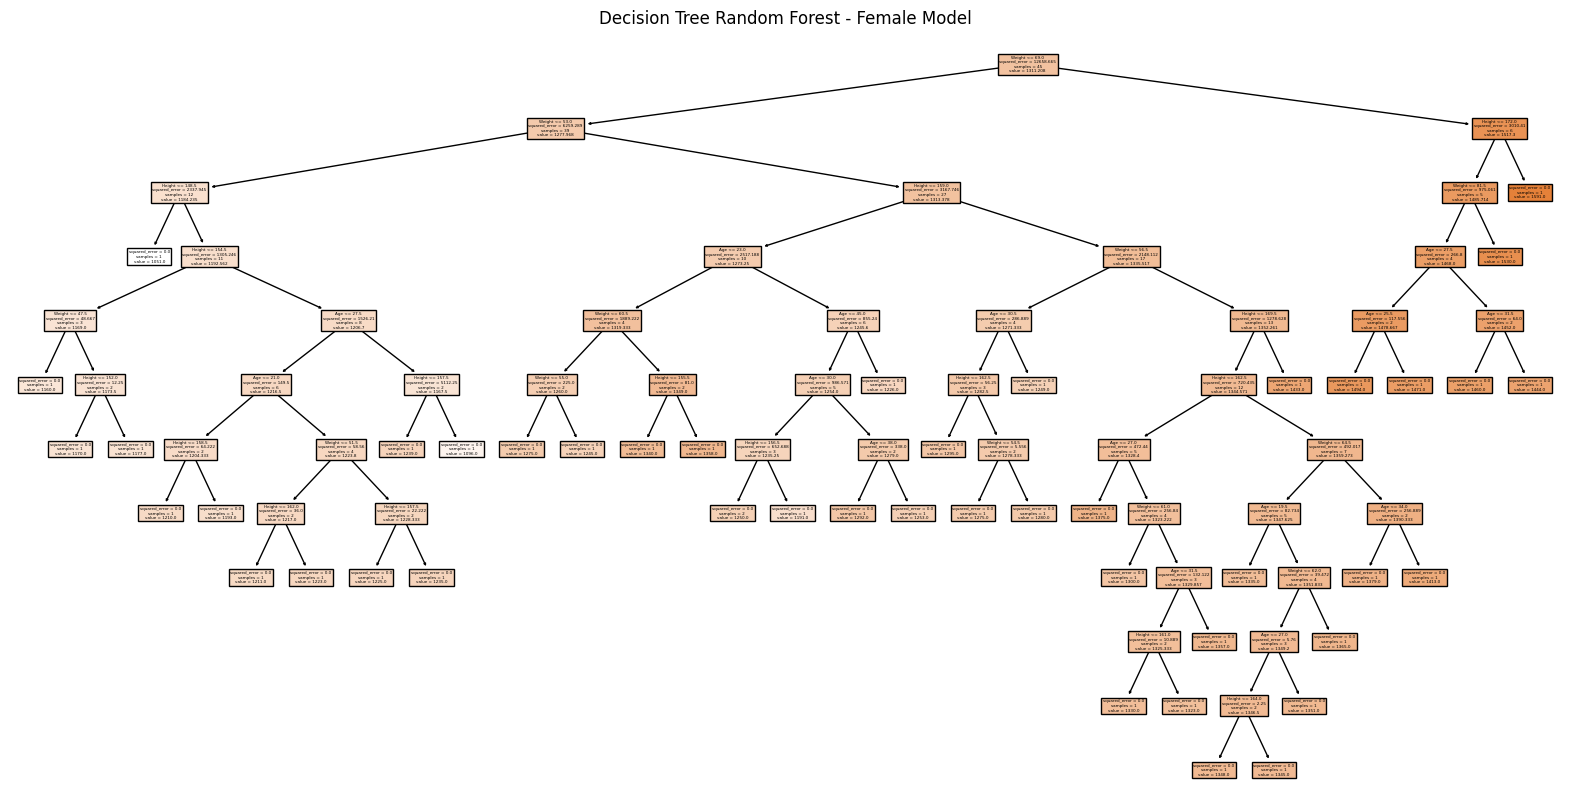

In [114]:
# Visualize a single decision tree from the male model
tree = model_male.estimators_[1]
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=['Age', 'Height', 'Weight'], filled=True)
plt.title("Decision Tree Random Forest - Male Model")
plt.show()

# Visualize a single decision tree from the female model
tree = model_female.estimators_[1]
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=['Age', 'Height', 'Weight'], filled=True)
plt.title("Decision Tree Random Forest - Female Model")
plt.show()

#the range of the estimator is from 0 to 99

### Feature Importances

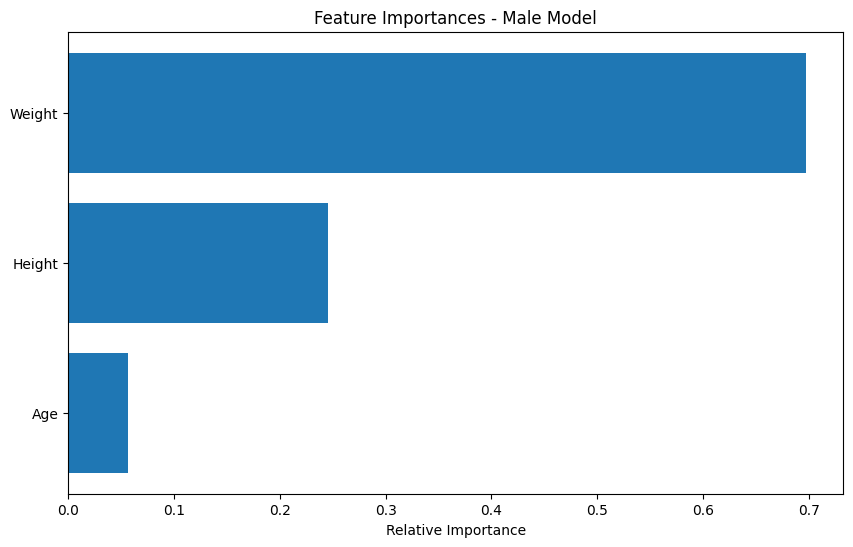

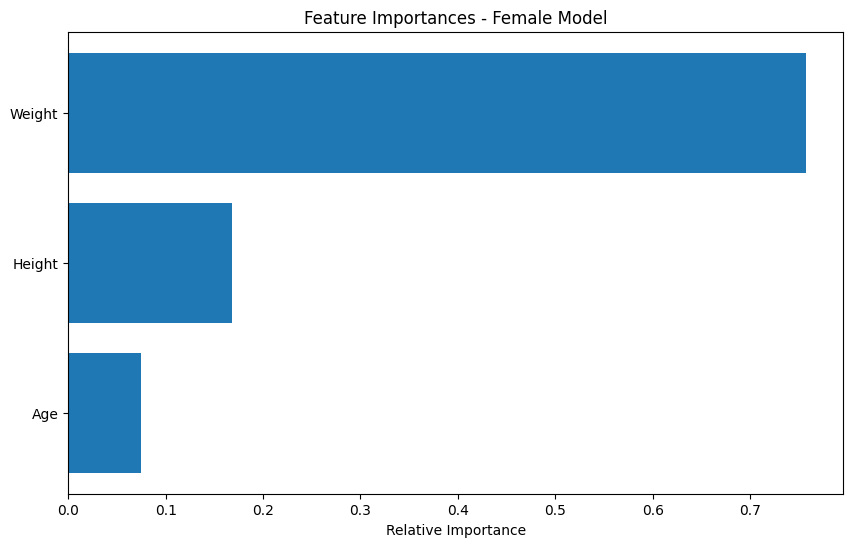

In [115]:
# Plot feature importances for the male model
importances_male = model_male.feature_importances_
indices_male = np.argsort(importances_male)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Male Model")
plt.barh(range(len(indices_male)), importances_male[indices_male], align="center")
plt.yticks(range(len(indices_male)), [X_male.columns[i] for i in indices_male])
plt.xlabel("Relative Importance")
plt.show()

# Plot feature importances for the female model
importances_female = model_female.feature_importances_
indices_female = np.argsort(importances_female)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Female Model")
plt.barh(range(len(indices_female)), importances_female[indices_female], align="center")
plt.yticks(range(len(indices_female)), [X_female.columns[i] for i in indices_female])
plt.xlabel("Relative Importance")
plt.show()